Design a simple linear neural network model.

In [1]:
x = float(input("Enter value of x: "))
w = float(input("Enter value of weight w: "))
b = float(input("Enter value of bias b: "))

net = w * x + b

if net < 0:
    out = 0
elif 0 <= net <= 1:
    out = net
else:
    out = 1

print("Net input =", net)
print("Output =", out)


Enter value of x: 1
Enter value of weight w: 0.5
Enter value of bias b: 0.2
Net input = 0.7
Output = 0.7


Calculate the output of neural net using both binary and bipolar sigmoidal
function

In [2]:
import math

n = int(input("Enter number of elements : "))

print("Enter the inputs")
inputs = []
for i in range(n):
    ele = float(input())
    inputs.append(ele)

print("Enter the weights")
weights = []
for i in range(n):
    ele = float(input())
    weights.append(ele)

b = float(input("Enter bias value: "))

Yin = sum(inputs[i] * weights[i] for i in range(n)) + b
print("\nNet input (Yin) =", round(Yin, 3))

def binary_sigmoid(x):
    return 1 / (1 + math.exp(-x))

def bipolar_sigmoid(x):
    return (1 - math.exp(-x)) / (1 + math.exp(-x))

print("Binary Sigmoid Output  =", round(binary_sigmoid(Yin), 3))
print("Bipolar Sigmoid Output =", round(bipolar_sigmoid(Yin), 3))


Enter number of elements : 3
Enter the inputs
0.3
0.5
6
Enter the weights
0.2
0.1
-0.3
Enter bias value: 0.1

Net input (Yin) = -1.59
Binary Sigmoid Output  = 0.169
Bipolar Sigmoid Output = -0.661


Generate AND/NOT function using McCulloch-Pitts neural net.


In [3]:
num_ip = int(input("Enter the number of inputs : "))

w1 = 1
w2 = 1

print("For the", num_ip, "inputs calculate the net input using yin = x1w1 + x2w2")

x1 = []
x2 = []
for j in range(0, num_ip):
    ele1 = int(input("x1 = "))
    ele2 = int(input("x2 = "))
    x1.append(ele1)
    x2.append(ele2)

print("x1 = ", x1)
print("x2 = ", x2)

n = [val * w1 for val in x1]
m = [val * w2 for val in x2]

Yin = []
for i in range(0, num_ip):
    Yin.append(n[i] + m[i])
print("Yin = ", Yin)

Yin = []
for i in range(0, num_ip):
    Yin.append(n[i] - m[i])
print("After assuming one weight as excitatory and the other as inhibitory Yin = ", Yin)

Y = []
for i in range(0, num_ip):
    if Yin[i] >= 1:
        ele = 1
        Y.append(ele)
    if Yin[i] < 1:
        ele = 0
        Y.append(ele)
print("Y = ", Y)


Enter the number of inputs : 4
For the 4 inputs calculate the net input using yin = x1w1 + x2w2
x1 = 0
x2 = 0
x1 = 0
x2 = 1
x1 = 1
x2 = 0
x1 = 1
x2 = 1
x1 =  [0, 0, 1, 1]
x2 =  [0, 1, 0, 1]
Yin =  [0, 1, 1, 2]
After assuming one weight as excitatory and the other as inhibitory Yin =  [0, -1, 1, 0]
Y =  [0, 0, 1, 0]


Generate XOR function using McCulloch-Pitts neural net

In [4]:
import numpy as np

x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
expected = np.array([0, 1, 1, 0])

def mcp_xor(x1, x2, theta=1):
    z1 = np.array([1 if (a == 1 and b == 0) else 0 for a, b in zip(x1, x2)])
    z2 = np.array([1 if (a == 0 and b == 1) else 0 for a, b in zip(x1, x2)])
    y = np.array([1 if (z1[i] + z2[i]) >= theta else 0 for i in range(len(z1))])
    return z1, z2, y

z1, z2, y = mcp_xor(x1, x2)

print("Inputs:")
print("x1:", x1)
print("x2:", x2)
print("\nHidden Neurons:")
print("z1:", z1)
print("z2:", z2)
print("\nOutput of Net (XOR):")
print("y :", y)
print("Expected:", expected)

if np.array_equal(y, expected):
    print("\n     XOR function generated successfully using McCulloch-Pitts Neural Net")
else:
    print("\n    Net did not learn XOR")


Inputs:
x1: [0 0 1 1]
x2: [0 1 0 1]

Hidden Neurons:
z1: [0 0 1 0]
z2: [0 1 0 0]

Output of Net (XOR):
y : [0 1 1 0]
Expected: [0 1 1 0]

     XOR function generated successfully using McCulloch-Pitts Neural Net


Write a program to implement Hebb’s rule.

In [5]:
import numpy as np

x1 = np.array([1, 1, 1, -1, 1, -1, 1, 1, 1])
x2 = np.array([1, 1, 1, 1, -1, 1, 1, 1, 1])

b = 0
y = np.array([1, -1])

wtold = np.zeros((9,))
wtnew = np.zeros((9,))

wtnew = wtnew.astype(int)
wtold = wtold.astype(int)

print("First input with target = 1")
for i in range(0, 9):
    wtold[i] = wtold[i] + x1[i] * y[0]
    wtnew = wtold.copy()

b = b + y[0]
print("new wt =", wtnew)
print("Bias value =", b)

print("\nSecond input with target = -1")
for i in range(0, 9):
    wtnew[i] = wtold[i] + x2[i] * y[1]

b = b + y[1]
print("new wt =", wtnew)
print("Bias value =", b)


First input with target = 1
new wt = [ 1  1  1 -1  1 -1  1  1  1]
Bias value = 1

Second input with target = -1
new wt = [ 0  0  0 -2  2 -2  0  0  0]
Bias value = 0


Write a program to implement of delta rule.

In [6]:
import numpy as np
import time

np.set_printoptions(precision=2)

x = np.zeros((3,))
weights = np.zeros((3,))
desired = np.zeros((3,))
actual = np.zeros((3,))

for i in range(0, 3):
    x[i] = float(input("Initial input x[" + str(i) + "]: "))

for i in range(0, 3):
    weights[i] = float(input("Initial weight w[" + str(i) + "]: "))

for i in range(0, 3):
    desired[i] = float(input("Desired output d[" + str(i) + "]: "))

a = float(input("Enter learning rate: "))

actual = x * weights
print("Initial actual:", actual)
print("Desired:", desired)

while True:
    if np.array_equal(desired, actual):
        break
    else:
        for i in range(0, 3):
            weights[i] = weights[i] + a * (desired[i] - actual[i])

        actual = x * weights
        print("Updated weights:", weights)
        print("Updated actual:", actual)
        print("Desired:", desired)
        print("*" * 30)
        time.sleep(1)

print("\nFinal output")
print("Corrected weights:", weights)
print("Final actual:", actual)
print("Desired:", desired)


Initial input x[0]: 1
Initial input x[1]: 1
Initial input x[2]: 1
Initial weight w[0]: 1
Initial weight w[1]: 1
Initial weight w[2]: 1
Desired output d[0]: 2
Desired output d[1]: 3
Desired output d[2]: 4
Enter learning rate: 1
Initial actual: [1. 1. 1.]
Desired: [2. 3. 4.]
Updated weights: [2. 3. 4.]
Updated actual: [2. 3. 4.]
Desired: [2. 3. 4.]
******************************

Final output
Corrected weights: [2. 3. 4.]
Final actual: [2. 3. 4.]
Desired: [2. 3. 4.]


Back Propagation Algorithm

In [7]:
import numpy as np
import math
np.set_printoptions(precision=4)

v1 = np.array([0.6, 0.3])
v2 = np.array([-0.1, 0.4])
w = np.array([-0.2, 0.4, 0.1])
b1 = 0.3
b2 = 0.5
x1 = 0
x2 = 1
alpha = 0.25

print("Calculate net input to z1 layer")
zin1 = b1 + x1 * v1[0] + x2 * v2[0]
print("z1 net =", round(zin1, 4))

print("Calculate net input to z2 layer")
zin2 = b2 + x1 * v1[1] + x2 * v2[1]
print("z2 net =", round(zin2, 4))

print("\nApply activation function (Sigmoid) to calculate outputs")
z1 = 1 / (1 + math.exp(-zin1))
z2 = 1 / (1 + math.exp(-zin2))
print("z1 =", round(z1, 4))
print("z2 =", round(z2, 4))

print("\nCalculate net input to output layer")
yin = w[0] + z1 * w[1] + z2 * w[2]
print("yin =", round(yin, 4))

print("\nCalculate net output")
y = 1 / (1 + math.exp(-yin))
print("y =", round(y, 4))

fyin = y * (1 - y)
dk = (1 - y) * fyin
print("\ndk =", round(dk, 6))

dw1 = alpha * dk * z1
dw2 = alpha * dk * z2
dw0 = alpha * dk
print("\nWeight changes (hidden → output):")
print("dw1 =", round(dw1, 6))
print("dw2 =", round(dw2, 6))
print("dw0 =", round(dw0, 6))

din1 = dk * w[1]
din2 = dk * w[2]
print("\ndin1 =", round(din1, 6))
print("din2 =", round(din2, 6))

print("\nError in delta (hidden layer)")
fzin1 = z1 * (1 - z1)
fzin2 = z2 * (1 - z2)
d1 = din1 * fzin1
d2 = din2 * fzin2
print("fzin1 =", round(fzin1, 6), " d1 =", round(d1, 6))
print("fzin2 =", round(fzin2, 6), " d2 =", round(d2, 6))

dv11 = alpha * d1 * x1
dv21 = alpha * d1 * x2
dv01 = alpha * d1
dv12 = alpha * d2 * x1
dv22 = alpha * d2 * x2
dv02 = alpha * d2

print("\nWeight changes (input → hidden):")
print("dv11 =", round(dv11, 6))
print("dv21 =", round(dv21, 6))
print("dv01 =", round(dv01, 6))
print("dv12 =", round(dv12, 6))
print("dv22 =", round(dv22, 6))
print("dv02 =", round(dv02, 6))

v1[0] += dv11
v1[1] += dv12
v2[0] += dv21
v2[1] += dv22
w[1] += dw1
w[2] += dw2
w[0] += dw0
b1 += dv01
b2 += dv02

print("\nFinal updated weights of network:")
print("v1 =", v1)
print("v2 =", v2)
print("w =", w)
print("bias b1 =", b1, " b2 =", b2)


Calculate net input to z1 layer
z1 net = 0.2
Calculate net input to z2 layer
z2 net = 0.9

Apply activation function (Sigmoid) to calculate outputs
z1 = 0.5498
z2 = 0.7109

Calculate net input to output layer
yin = 0.091

Calculate net output
y = 0.5227

dk = 0.119068

Weight changes (hidden → output):
dw1 = 0.016367
dw2 = 0.021163
dw0 = 0.029767

din1 = 0.047627
din2 = 0.011907

Error in delta (hidden layer)
fzin1 = 0.247517  d1 = 0.011789
fzin2 = 0.2055  d2 = 0.002447

Weight changes (input → hidden):
dv11 = 0.0
dv21 = 0.002947
dv01 = 0.002947
dv12 = 0.0
dv22 = 0.000612
dv02 = 0.000612

Final updated weights of network:
v1 = [0.6 0.3]
v2 = [-0.0971  0.4006]
w = [-0.1702  0.4164  0.1212]
bias b1 = 0.30294712576780886  b2 = 0.5006117118183497


error Backpropagation algorithm

In [8]:
import math
a0 = -1
t = -1

w10 = float(input("Enter weight first network: "))
b10 = float(input("Enter bias first network: "))
w20 = float(input("Enter weight second network: "))
b20 = float(input("Enter bias second network: "))
c = float(input("Enter learning coefficient: "))

n1 = float(w10 * a0 + b10)
a1 = math.tanh(n1)
n2 = float(w20 * a1 + b20)
a2 = math.tanh(n2)

e = t - a2

s2 = -2 * (1 - a2 * a2) * e
s1 = (1 - a1 * a1) * w20 * s2

w21 = w20 - (c * s2 * a1)
w11 = w10 - (c * s1 * a0)

b21 = b20 - (c * s2)
b11 = b10 - (c * s1)

print("The updated weight of first n/w (w11) =", w11)
print("The updated weight of second n/w (w21) =", w21)
print("The updated bias of first n/w (b11) =", b11)
print("The updated bias of second n/w (b21) =", b21)


Enter weight first network: 12
Enter bias first network: 35
Enter weight second network: 23
Enter bias second network: 45
Enter learning coefficient: 11
The updated weight of first n/w (w11) = 12.0
The updated weight of second n/w (w21) = 23.0
The updated bias of first n/w (b11) = 35.0
The updated bias of second n/w (b21) = 45.0


Hopfield Network

In [9]:
import numpy as np

def threshold(x):
    return np.where(x >= 0, 1, 0)

class HopfieldNetwork:
    def __init__(self, weights):
        self.weights = np.array(weights)

    def activate(self, pattern):
        pattern = np.array(pattern)
        print("\nActivating with pattern:", pattern)
        activations = self.weights.dot(pattern)
        print("Activations:", activations)
        output = threshold(activations)
        print("Output:", output)
        return output

if __name__ == "__main__":
    pattern1 = [1, 0, 1, 0]
    pattern2 = [0, 1, 0, 1]
    weights = [
        [0, -3,  3, -3],
        [-3, 0, -3,  3],
        [3, -3,  0, -3],
        [-3, 3, -3,  0]
    ]
    print("Hopfield Network with 4 neurons \n")
    net = HopfieldNetwork(weights)
    out1 = net.activate(pattern1)
    print("Expected:", pattern1, "Got:", out1.tolist())
    out2 = net.activate(pattern2)
    print("Expected:", pattern2, "Got:", out2.tolist())


Hopfield Network with 4 neurons 


Activating with pattern: [1 0 1 0]
Activations: [ 3 -6  3 -6]
Output: [1 0 1 0]
Expected: [1, 0, 1, 0] Got: [1, 0, 1, 0]

Activating with pattern: [0 1 0 1]
Activations: [-6  3 -6  3]
Output: [0 1 0 1]
Expected: [0, 1, 0, 1] Got: [0, 1, 0, 1]


Radial Basis function


Centers: [array([-0.5354]), array([-0.6768]), array([-0.8384]), array([1.]), array([0.1111]), array([-0.9596]), array([0.1919]), array([-0.6364]), array([0.5354]), array([-0.6566])]
Activation matrix G:
 [[1.7779e-01 4.3351e-01 8.1143e-01 1.2664e-14 5.1366e-05 9.8703e-01
  1.1590e-05 3.4720e-01 6.4545e-09 3.8923e-01]
 [2.0592e-01 4.7969e-01 8.5216e-01 2.4094e-14 7.3321e-05 9.9674e-01
  1.6982e-05 3.8923e-01 1.0568e-08 4.3351e-01]
 [2.3696e-01 5.2733e-01 8.8911e-01 4.5542e-14 1.0398e-04 1.0000e+00
  2.4720e-05 4.3351e-01 1.7189e-08 4.7969e-01]
 [2.7090e-01 5.7592e-01 9.2162e-01 8.5523e-14 1.4650e-04 9.9674e-01
  3.5750e-05 4.7969e-01 2.7777e-08 5.2733e-01]
 [3.0769e-01 6.2490e-01 9.4910e-01 1.5956e-13 2.0506e-04 9.8703e-01
  5.1366e-05 5.2733e-01 4.4596e-08 5.7592e-01]
 [3.4720e-01 6.7364e-01 9.7104e-01 2.9574e-13 2.8517e-04 9.7104e-01
  7.3321e-05 5.7592e-01 7.1132e-08 6.2490e-01]
 [3.8923e-01 7.2145e-01 9.8703e-01 5.4459e-13 3.9398e-04 9.4910e-01
  1.0398e-04 6.2490e-01 1.1272e-07 6.7

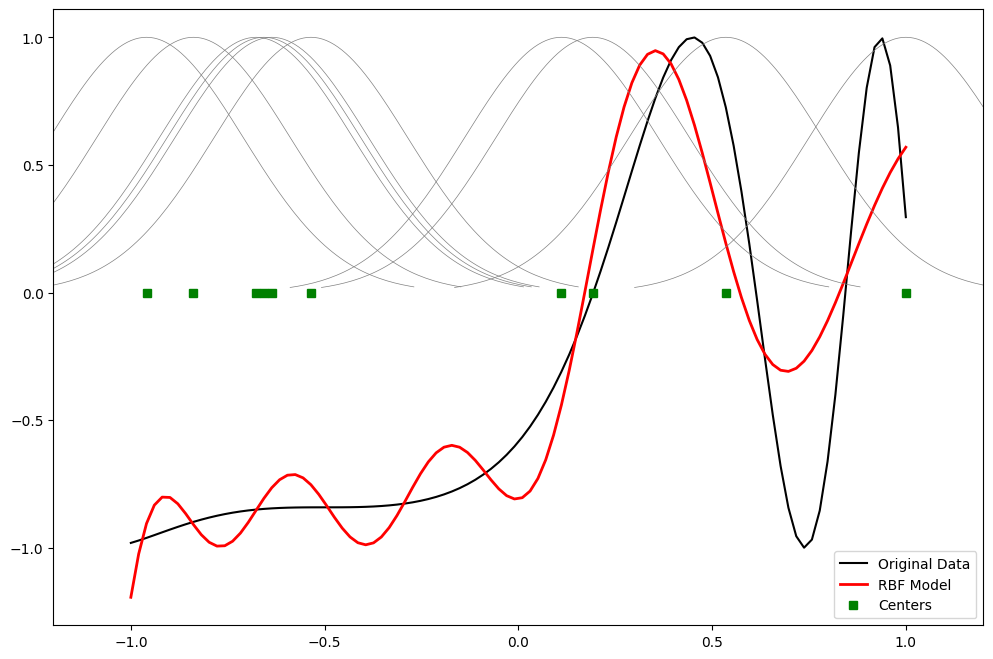

In [10]:
import numpy as np
from numpy.linalg import norm, pinv
from matplotlib import pyplot as plt

class RBF:
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [np.random.uniform(-1, 1, indim) for _ in range(numCenters)]
        self.beta = 8
        self.W = np.random.random((self.numCenters, self.outdim))

    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return np.exp(-self.beta * norm(c - d) ** 2)

    def _calcAct(self, X):
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi, ci] = self._basisfunc(c, x)
        return G

    def train(self, X, Y):
        rnd_idx = np.random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i, :] for i in rnd_idx]
        print("Centers:", self.centers)
        G = self._calcAct(X)
        print("Activation matrix G:\n", G)
        self.W = np.dot(pinv(G), Y)

    def test(self, X):
        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y

if __name__ == "__main__":
    n = 100
    x = np.mgrid[-1:1:complex(0, n)].reshape(n, 1)
    y = np.sin(3 * (x + 0.5) ** 3 - 1)
    rbf = RBF(1, 10, 1)
    rbf.train(x, y)
    z = rbf.test(x)
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'k-', label="Original Data")
    plt.plot(x, z, 'r-', linewidth=2, label="RBF Model")
    plt.plot([c[0] for c in rbf.centers], np.zeros(rbf.numCenters), 'gs', label="Centers")
    for c in rbf.centers:
        cx = np.arange(c[0] - 0.7, c[0] + 0.7, 0.01)
        cy = [rbf._basisfunc(np.array([cx_]), c) for cx_ in cx]
        plt.plot(cx, cy, '-', color='gray', linewidth=0.5)
    plt.xlim(-1.2, 1.2)
    plt.legend()
    plt.show()


Kohonen Self organizing map

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=a5e103117494bd9d47522b0b43b24429c702f164a4dad2f0d4e71831887c1212
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


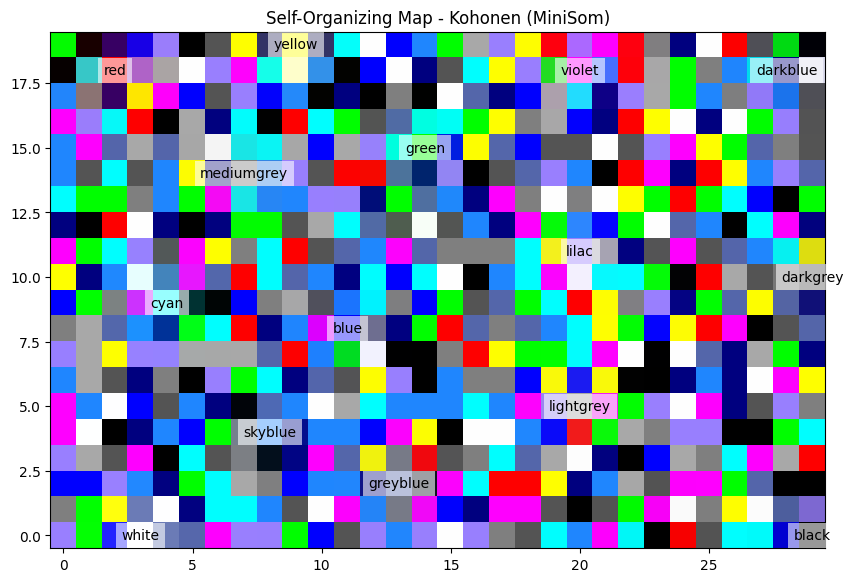

In [11]:
!pip install minisom

import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

colors = np.array([
    [0., 0., 0.],
    [0., 0., 1.],
    [0., 0., 0.5],
    [0.125, 0.529, 1.0],
    [0.33, 0.4, 0.67],
    [0.6, 0.5, 1.0],
    [0., 1., 0.],
    [1., 0., 0.],
    [0., 1., 1.],
    [1., 0., 1.],
    [1., 1., 0.],
    [1., 1., 1.],
    [0.33, 0.33, 0.33],
    [0.5, 0.5, 0.5],
    [0.66, 0.66, 0.66]
])

color_names = [
    'black','blue','darkblue','skyblue',
    'greyblue','lilac','green','red',
    'cyan','violet','yellow','white',
    'darkgrey','mediumgrey','lightgrey'
]

som = MiniSom(x=20, y=30, input_len=3, sigma=1.0, learning_rate=0.05)
som.random_weights_init(colors)
som.train_random(colors, 400)

plt.figure(figsize=(10, 7))
weights = som.get_weights()

plt.imshow(weights, origin='lower')
plt.title("Self-Organizing Map - Kohonen (MiniSom)")

for i, color in enumerate(colors):
    w = som.winner(color)
    plt.text(w[1], w[0], color_names[i],
             ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.6, lw=0))

plt.show()


Adaptive resonance theory

In [12]:
!pip install artlib
import numpy as np

class ART1:
    def __init__(self, n_features, n_categories, rho=0.8):
        self.W = np.ones((n_categories, n_features), dtype=int)
        self.rho = rho
        self.n_categories = n_categories

    def train(self, patterns):
        category_used = 0
        for pattern in patterns:
            for i in range(self.n_categories):
                match = np.all((pattern & self.W[i]) == pattern)
                similarity = np.sum(pattern & self.W[i]) / np.sum(pattern)
                if match and similarity >= self.rho:
                    self.W[i] = self.W[i] & pattern
                    break
            else:
                if category_used < self.n_categories:
                    self.W[category_used] = pattern
                    category_used += 1

    def predict(self, pattern):
        for i in range(self.n_categories):
            match = np.all((pattern & self.W[i]) == pattern)
            similarity = np.sum(pattern & self.W[i]) / np.sum(pattern)
            if match and similarity >= self.rho:
                return i
        return -1

if __name__ == "__main__":
    patterns = np.array([
        [1, 0, 1, 0],
        [1, 1, 1, 0],
        [0, 1, 0, 1]
    ])

    art = ART1(n_features=4, n_categories=3, rho=0.8)
    art.train(patterns)

    print("Trained category weights (bottom-up):")
    print(art.W)

    new_pattern = np.array([1, 0, 1, 0])
    category = art.predict(new_pattern)
    print(f"Pattern {new_pattern} belongs to category {category}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 7.6 MB/s eta 0:00:00
Trained category weights (bottom-up):
[[1 0 1 0]
 [1 1 1 0]
 [0 1 0 1]]
Pattern [1 0 1 0] belongs to category 0


Linear separation

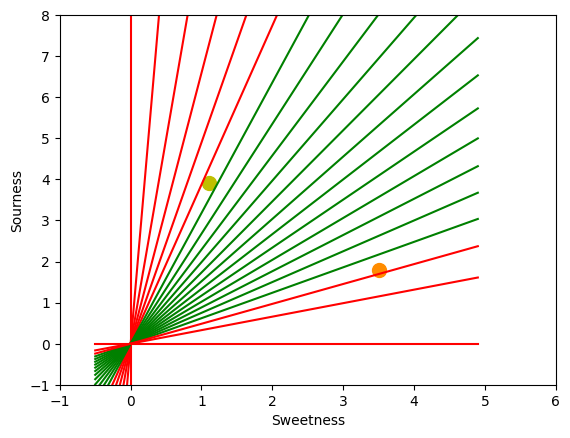

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def create_distance_function(a, b, c):
    def distance(x, y):
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom < 0 and b < 0) or (nom > 0 and b > 0):
            pos = -1
        else:
            pos = 1
        return (np.abs(nom) / np.sqrt(a ** 2 + b ** 2), pos)
    return distance

points = [(3.5, 1.8), (1.1, 3.9)]

fig, ax = plt.subplots()
ax.set_xlabel("Sweetness")
ax.set_ylabel("Sourness")
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 8])
X = np.arange(-0.5, 5, 0.1)

size = 10
for index, (x, y) in enumerate(points):
    if index == 0:
        ax.plot(x, y, "o", color="darkorange", markersize=size)
    else:
        ax.plot(x, y, "oy", markersize=size)

step = 0.05
for x in np.arange(0, 1 + step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in points:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-")
    else:
        ax.plot(X, Y, "r-")

plt.show()


Hopfield network model for associative memory

Hopfield Network Demo - Associative Memory
Pattern size: 8x8 (64 neurons)
Number of stored patterns: 3
Noise level: 40.0%
Recall accuracy: 71.9%
Converged in 3 iterations


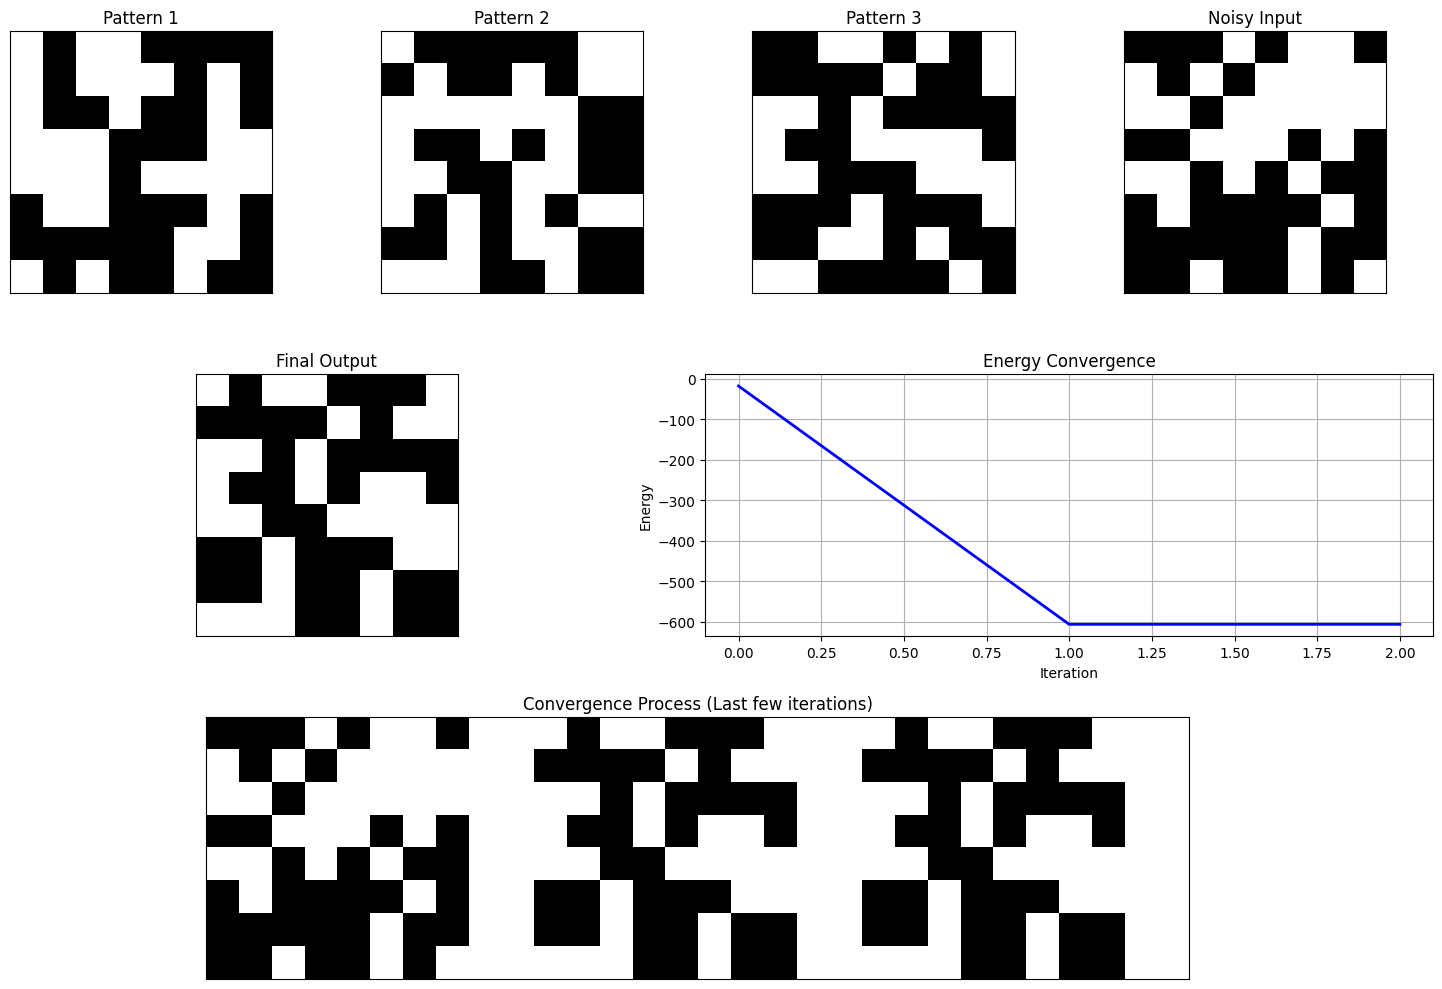

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Button
import time

class HopfieldNetwork:
    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
        self.weights = np.zeros((n_neurons, n_neurons))
        self.patterns = []

    def train(self, patterns):
        self.patterns = np.array(patterns)
        n_patterns = len(patterns)
        self.weights = np.zeros((self.n_neurons, self.n_neurons))
        for pattern in patterns:
            pattern = np.array(pattern).reshape(-1, 1)
            self.weights += np.dot(pattern, pattern.T)
        np.fill_diagonal(self.weights, 0)
        self.weights /= n_patterns

    def recall(self, input_pattern, max_iterations=100):
        pattern = np.array(input_pattern).copy()
        history = [pattern.copy()]
        for _ in range(max_iterations):
            update_order = np.random.permutation(self.n_neurons)
            for i in update_order:
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input >= 0 else -1
            history.append(pattern.copy())
            if np.array_equal(history[-1], history[-2]):
                break
        return pattern, history

    def calculate_energy(self, pattern):
        pattern = np.array(pattern)
        return -0.5 * np.dot(pattern.T, np.dot(self.weights, pattern))

    def add_noise(self, pattern, noise_level=0.3):
        noisy_pattern = pattern.copy()
        n_flips = int(noise_level * len(pattern))
        flip_indices = np.random.choice(len(pattern), n_flips, replace=False)
        noisy_pattern[flip_indices] *= -1
        return noisy_pattern

def create_patterns(grid_size, num_patterns):
    patterns = []
    for _ in range(num_patterns):
        pattern = np.random.choice([-1, 1], size=grid_size*grid_size)
        patterns.append(pattern)
    return patterns

def pattern_to_grid(pattern, grid_size):
    return pattern.reshape((grid_size, grid_size))

def visualize_hopfield(network, patterns, recalled_pattern, history, grid_size):
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(3, 4, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(pattern_to_grid(patterns[0], grid_size), cmap='binary', interpolation='nearest')
    ax1.set_title('Pattern 1')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(pattern_to_grid(patterns[1], grid_size), cmap='binary', interpolation='nearest')
    ax2.set_title('Pattern 2')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.imshow(pattern_to_grid(patterns[2], grid_size), cmap='binary', interpolation='nearest')
    ax3.set_title('Pattern 3')
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax4 = fig.add_subplot(gs[0, 3])
    ax4.imshow(pattern_to_grid(history[0], grid_size), cmap='binary', interpolation='nearest')
    ax4.set_title('Noisy Input')
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax5 = fig.add_subplot(gs[1, :2])
    ax5.imshow(pattern_to_grid(recalled_pattern, grid_size), cmap='binary', interpolation='nearest')
    ax5.set_title('Final Output')
    ax5.set_xticks([])
    ax5.set_yticks([])
    ax6 = fig.add_subplot(gs[1, 2:])
    energy_history = [network.calculate_energy(state) for state in history]
    ax6.plot(energy_history, 'b-', linewidth=2)
    ax6.set_xlabel('Iteration')
    ax6.set_ylabel('Energy')
    ax6.set_title('Energy Convergence')
    ax6.grid(True)
    ax7 = fig.add_subplot(gs[2, :])
    ax7.set_title('Convergence Process (Last few iterations)')
    ax7.set_xticks([])
    ax7.set_yticks([])
    n_frames = min(8, len(history))
    for i, state in enumerate(history[-n_frames:]):
        offset = i * (grid_size + 2)
        ax7.imshow(pattern_to_grid(state, grid_size), cmap='binary', interpolation='nearest', extent=[offset, offset + grid_size, 0, grid_size])
    ax7.set_xlim(0, n_frames * (grid_size + 2))
    ax7.set_ylim(0, grid_size)
    plt.tight_layout()
    plt.show()

def run_demo():
    grid_size = 8
    n_neurons = grid_size * grid_size
    num_patterns = 3
    noise_level = 0.4
    network = HopfieldNetwork(n_neurons)
    patterns = create_patterns(grid_size, num_patterns)
    network.train(patterns)
    target_pattern = patterns[0]
    noisy_input = network.add_noise(target_pattern, noise_level)
    recalled_pattern, history = network.recall(noisy_input)
    accuracy = np.mean(target_pattern == recalled_pattern) * 100
    print(f"Pattern size: {grid_size}x{grid_size} ({n_neurons} neurons)")
    print(f"Number of stored patterns: {num_patterns}")
    print(f"Noise level: {noise_level * 100}%")
    print(f"Recall accuracy: {accuracy:.1f}%")
    print(f"Converged in {len(history)} iterations")
    visualize_hopfield(network, patterns, recalled_pattern, history, grid_size)
    return network, patterns, noisy_input, recalled_pattern, history

def interactive_demo():
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    plt.subplots_adjust(bottom=0.2)
    grid_size = 8
    n_neurons = grid_size * grid_size
    num_patterns = 3
    network = HopfieldNetwork(n_neurons)
    patterns = create_patterns(grid_size, num_patterns)
    network.train(patterns)
    current_pattern_idx = 0
    noise_level = 0.4
    def update_display(pattern_idx, noise_level):
        for ax in axes.flat:
            ax.clear()
            ax.set_xticks([])
            ax.set_yticks([])
        target_pattern = patterns[pattern_idx]
        noisy_input = network.add_noise(target_pattern, noise_level)
        recalled_pattern, history = network.recall(noisy_input)
        accuracy = np.mean(target_pattern == recalled_pattern) * 100
        axes[0,0].imshow(pattern_to_grid(patterns[0], grid_size), cmap='binary')
        axes[0,0].set_title('Pattern 1')
        axes[0,1].imshow(pattern_to_grid(patterns[1], grid_size), cmap='binary')
        axes[0,1].set_title('Pattern 2')
        axes[0,2].imshow(pattern_to_grid(patterns[2], grid_size), cmap='binary')
        axes[0,2].set_title('Pattern 3')
        axes[1,0].imshow(pattern_to_grid(noisy_input, grid_size), cmap='binary')
        axes[1,0].set_title(f'Noisy Input ({noise_level*100:.0f}% noise)')
        axes[1,1].imshow(pattern_to_grid(recalled_pattern, grid_size), cmap='binary')
        axes[1,1].set_title(f'Recalled ({accuracy:.1f}% accuracy)')
        energy_history = [network.calculate_energy(state) for state in history]
        axes[1,2].plot(energy_history, 'b-')
        axes[1,2].set_title('Energy Convergence')
        axes[1,2].set_xlabel('Iterations')
        axes[1,2].set_ylabel('Energy')
        axes[1,2].grid(True)
        plt.draw()
    ax_prev = plt.axes([0.2, 0.05, 0.1, 0.075])
    ax_next = plt.axes([0.35, 0.05, 0.1, 0.075])
    ax_more_noise = plt.axes([0.5, 0.05, 0.1, 0.075])
    ax_less_noise = plt.axes([0.65, 0.05, 0.1, 0.075])
    btn_prev = Button(ax_prev, 'Previous')
    btn_next = Button(ax_next, 'Next')
    btn_more_noise = Button(ax_more_noise, 'More Noise')
    btn_less_noise = Button(ax_less_noise, 'Less Noise')
    def next_pattern(event):
        nonlocal current_pattern_idx
        current_pattern_idx = (current_pattern_idx + 1) % num_patterns
        update_display(current_pattern_idx, noise_level)
    def prev_pattern(event):
        nonlocal current_pattern_idx
        current_pattern_idx = (current_pattern_idx - 1) % num_patterns
        update_display(current_pattern_idx, noise_level)
    def increase_noise(event):
        nonlocal noise_level
        noise_level = min(0.8, noise_level + 0.1)
        update_display(current_pattern_idx, noise_level)
    def decrease_noise(event):
        nonlocal noise_level
        noise_level = max(0.1, noise_level - 0.1)
        update_display(current_pattern_idx, noise_level)
    btn_next.on_clicked(next_pattern)
    btn_prev.on_clicked(prev_pattern)
    btn_more_noise.on_clicked(increase_noise)
    btn_less_noise.on_clicked(decrease_noise)
    update_display(current_pattern_idx, noise_level)
    plt.show()

if __name__ == "__main__":
    print("Hopfield Network Demo - Associative Memory")
    print("=" * 50)
    network, patterns, noisy_input, recalled_pattern, history = run_demo()

Membership and Identity Operators | in, not in,

In [15]:
list1 = [1, 2, 3, 4, 5]
list2 = [6, 7, 8, 9]

if 3 in list1:
    print("3 is in list1")

if 7 not in list1:
    print("7 is not in list1")

x = [10, 20, 30]
y = [10, 20, 30]
z = x

print(x is z)
print(x is y)
print(x is not y)


3 is in list1
7 is not in list1
True
False
True



 Membership and Identity Operators is, is not

In [16]:
list1 = [1, 2, 3, 4, 5]

if 3 in list1:
    print("3 is in list1")

if 7 not in list1:
    print("7 is not in list1")

x = 5
if type(x) is int:
    print("x is an integer")

y = 5.2
if type(y) is not int:
    print("y is not an integer")


3 is in list1
7 is not in list1
x is an integer
y is not an integer


Find ratios using fuzzy logic

In [17]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

s1 = "I love fuzzysforfuzzys"
s2 = "I am loving fuzzysforfuzzys"

print("FuzzyWuzzy Ratio:", fuzz.ratio(s1, s2))
print("FuzzyWuzzyPartialRatio:", fuzz.partial_ratio(s1, s2))
print("FuzzyWuzzyTokenSortRatio:", fuzz.token_sort_ratio(s1, s2))
print("FuzzyWuzzyTokenSetRatio:", fuzz.token_set_ratio(s1, s2))
print("FuzzyWuzzyWRatio:", fuzz.WRatio(s1, s2), '\n\n')

query = 'fuzzys for fuzzys'
choices = ['fuzzy for fuzzy', 'fuzzy fuzzy', 'g. for fuzzys']

print("List of ratios:")
print(process.extract(query, choices), '\n')
print("Best among the above list:", process.extractOne(query, choices))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.1 MB/s eta 0:00:00
FuzzyWuzzy Ratio: 86
FuzzyWuzzyPartialRatio: 86
FuzzyWuzzyTokenSortRatio: 86
FuzzyWuzzyTokenSetRatio: 87
FuzzyWuzzyWRatio: 86 


List of ratios:
[('g. for fuzzys', 95), ('fuzzy for fuzzy', 94), ('fuzzy fuzzy', 86)] 

Best among the above list: ('g. for fuzzys', 95)


Solve Tipping problem using fuzzy logic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.5 MB/s eta 0:00:00
Enter food quality (0–10): 2
Enter service level (0–10): 3

Predicted tip: 10.84


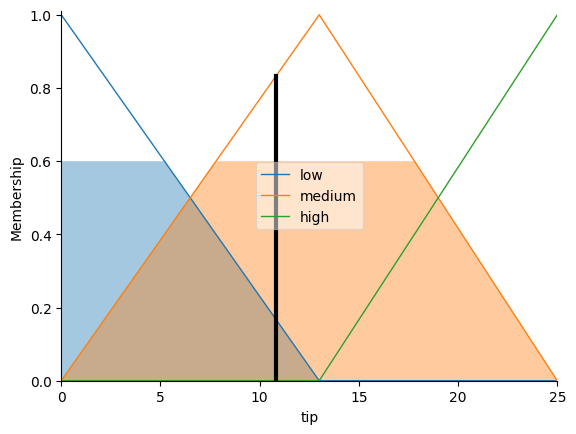

In [18]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

quality.automf(3)
service.automf(3)

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

q = float(input("Enter food quality (0–10): "))
s = float(input("Enter service level (0–10): "))

tipping.input['quality'] = q
tipping.input['service'] = s

tipping.compute()

print("\nPredicted tip: {:.2f}".format(tipping.output['tip']))

tip.view(sim=tipping)
plt.show()


Implementation of Simple genetic algorithm


Generation: 1	Best String: wxSm"[ -kL4%rdqu{vds	Fitness: 18
Generation: 2	Best String: wxSm"[ -kL4%rdqu{vds	Fitness: 18
Generation: 3	Best String: wI5m21 BD3wyHoqr{B}s	Fitness: 17
Generation: 4	Best String: ,aModeH{/ vIkoE!l"xs	Fitness: 16
Generation: 5	Best String: ,xMoBe Bk wIroq!{,,s	Fitness: 15
Generation: 6	Best String: I dovj8XN(As0
]L{rxs	Fitness: 14
Generation: 7	Best String: I dovj8XNlk00l{c"1ks	Fitness: 13
Generation: 8	Best String: I dovj8XNlk00l{c"1ks	Fitness: 13
Generation: 9	Best String: I Move Xslk]ro{c"-[s	Fitness: 11
Generation: 10	Best String: I Move Xslk]ro{c"-[s	Fitness: 11
Generation: 11	Best String: h Move Xe)k]ro-B{0ks	Fitness: 10
Generation: 12	Best String: I Mobe Xe)ks0oPB{Tks	Fitness: 9
Generation: 13	Best String: I Mobe Xe)ks0oPB{Tks	Fitness: 9
Generation: 14	Best String: I _oZe .elksqo{ne"ks	Fitness: 8
Generation: 15	Best String: I _oZe .elksqo{ne"ks	Fitness: 8
Generation: 16	Best String: I _oZe .elksqo{ne"ks	Fitness: 8
Generation: 17	Best String: I )ove GeJ

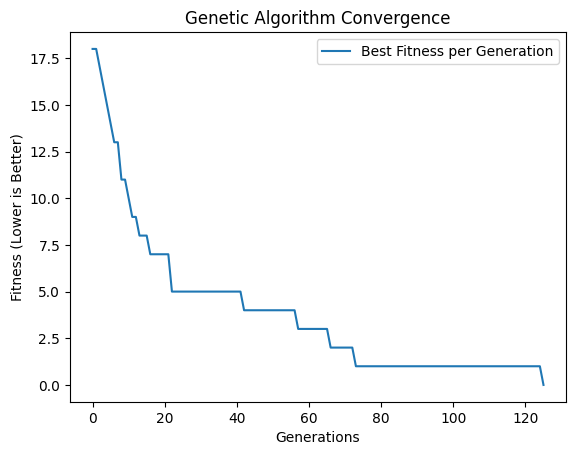

In [22]:
import random
import matplotlib.pyplot as plt

POPULATION_SIZE = 100
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890, .-;:_!"#%&/()=?@${[]}'''
TARGET = "I love GeeksforGeeks"

class Individual(object):
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(self):
        global GENES
        gene = random.choice(GENES)
        return gene

    @classmethod
    def create_gnome(self):
        global TARGET
        gnome_len = len(TARGET)
        return [self.mutated_genes() for _ in range(gnome_len)]

    def mate(self, par2):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes())
        return Individual(child_chromosome)

    def cal_fitness(self):
        global TARGET
        fitness = 0
        for gs, gt in zip(self.chromosome, TARGET):
            if gs != gt:
                fitness += 1
        return fitness

def main():
    global POPULATION_SIZE
    generation = 1
    found = False
    population = []
    fitness_history = []

    for _ in range(POPULATION_SIZE):
        gnome = Individual.create_gnome()
        population.append(Individual(gnome))

    while not found:
        population = sorted(population, key=lambda x: x.fitness)
        fitness_history.append(population[0].fitness)
        print("Generation: {}\tBest String: {}\tFitness: {}".format(
            generation,
            "".join(population[0].chromosome),
            population[0].fitness
        ))
        if population[0].fitness <= 0:
            found = True
            break

        new_generation = []
        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])
        s = int((90 * POPULATION_SIZE) / 100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)
        population = new_generation
        generation += 1

    print("\nTarget Reached in Generation {}!".format(generation))
    print("Final String: {}\tFitness: {}".format(
        "".join(population[0].chromosome),
        population[0].fitness
    ))

    plt.plot(fitness_history, label="Best Fitness per Generation")
    plt.xlabel("Generations")
    plt.ylabel("Fitness (Lower is Better)")
    plt.title("Genetic Algorithm Convergence")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Create two classes: City and Fitness using Genetic algorithm


Initial distance: 1841.1682564391754
Final distance: 862.8795116227425
Best Route: [(15, 193), (27, 180), (19, 119), (35, 125), (64, 158), (65, 160), (81, 173), (96, 173), (146, 185), (140, 156), (175, 123), (158, 114), (149, 110), (141, 83), (175, 38), (131, 43), (88, 34), (20, 56), (26, 58), (101, 65), (108, 103), (118, 128), (94, 165), (75, 186), (24, 198)]


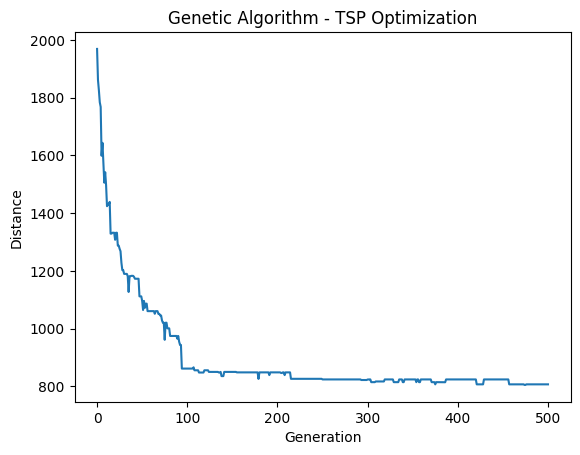

In [23]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance

    def __repr__(self):
        return f"({self.x}, {self.y})"

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0

    def routeDistance(self):
        if self.distance == 0:
            pathDistance = 0
            for i in range(len(self.route)):
                fromCity = self.route[i]
                toCity = self.route[(i + 1) % len(self.route)]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

def createRoute(cityList):
    return random.sample(cityList, len(cityList))

def initialPopulation(popSize, cityList):
    return [createRoute(cityList) for _ in range(popSize)]

def rankRoutes(population):
    fitnessResults = {i: Fitness(pop).routeFitness() for i, pop in enumerate(population)}
    return sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=True)

def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index", "Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()
    for i in range(eliteSize):
        selectionResults.append(popRanked[i][0])
    for _ in range(len(popRanked) - eliteSize):
        pick = 100 * random.random()
        for i in range(len(popRanked)):
            if pick <= df.iat[i, 3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    return [population[i] for i in selectionResults]

def breed(parent1, parent2):
    childP1, childP2 = [], []
    geneA, geneB = int(random.random() * len(parent1)), int(random.random() * len(parent1))
    startGene, endGene = min(geneA, geneB), max(geneA, geneB)
    for i in range(startGene, endGene):
        childP1.append(parent1[i])
    childP2 = [item for item in parent2 if item not in childP1]
    return childP1 + childP2

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))
    children.extend(matingpool[:eliteSize])
    for i in range(length):
        child = breed(pool[i], pool[len(matingpool) - i - 1])
        children.append(child)
    return children

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if random.random() < mutationRate:
            swapWith = int(random.random() * len(individual))
            individual[swapped], individual[swapWith] = individual[swapWith], individual[swapped]
    return individual

def mutatePopulation(population, mutationRate):
    return [mutate(ind, mutationRate) for ind in population]

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGen = mutatePopulation(children, mutationRate)
    return nextGen

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    for i in range(generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = [1 / rankRoutes(pop)[0][1]]
    for i in range(generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.title("Genetic Algorithm - TSP Optimization")
    plt.show()

def main():
    cityList = [City(x=int(random.random() * 200), y=int(random.random() * 200)) for _ in range(25)]
    bestRoute = geneticAlgorithm(population=cityList, popSize=100, eliteSize=20,
                                 mutationRate=0.01, generations=500)
    print("Best Route:", bestRoute)
    geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20,
                         mutationRate=0.01, generations=500)

if __name__ == "__main__":
    main()
